# Distâncias e círculos

## Distância euclideana

In [2]:
def distancia_euclideana(x, y):
    return ((x[0]-y[0]) ** 2 + (x[1] - y[1]) ** 2) ** 0.5


x = [3, 5]
y = [6, 9]

distancia_euclideana(x, y)

5.0

In [7]:
x = np.array([3, 5])
y = np.array([6, 9])

distancia_euclideana(x, y)

5.0

### Com a biblioteca numpy

In [9]:
import numpy as np

np.linalg.norm(x - y)

5.0

### Com a biblioteca scipy

In [10]:
from scipy.spatial import distance

distance.euclidean(x, y)

5.0

## Círculo

Um círculo de centro $P$ e raio $R$ é o conjunto de pontos do plano cartesiano cuja a distância euclideana a $P$ é exatamente $R$.

In [53]:
import matplotlib.pyplot as plt

all_x = np.arange(-1.01, 1.01, 0.01)
all_y = np.arange(-1.01, 1.01, 0.01)

x_coordinates_in_circle = []
y_coordinates_in_circle = []

for x in all_x:
    for y in all_y:
        if abs(np.linalg.norm([x, y]) - 1) < 0.01:
            x_coordinates_in_circle.append(x)
            y_coordinates_in_circle.append(y)

In [54]:
len(x_coordinates_in_circle)

1252

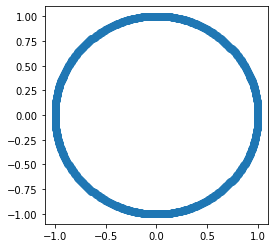

In [55]:
fig = plt.figure(figsize=(4,4))

styles = {
    "color": 'b',
    "markeredgewidth": 1, 
    "markersize": 3
}
            
plt.scatter(x_coordinates_in_circle, y_coordinates_in_circle)
plt.show()

In [83]:
def plot_circle(P, R, color='g'):
    all_x = np.arange(P[0]-R, P[0]+R, 0.01)
    all_y = np.arange(P[1]-R, P[1]+R, 0.01)

    x_coordinates_in_circle = []
    y_coordinates_in_circle = []

    for x in all_x:
        for y in all_y:
            if abs(np.linalg.norm([x - P[0], y - P[1]]) - R) < 0.01:
                x_coordinates_in_circle.append(x)
                y_coordinates_in_circle.append(y)
    plt.scatter(x_coordinates_in_circle, y_coordinates_in_circle, c='g', s=1)
    plt.axis("equal")

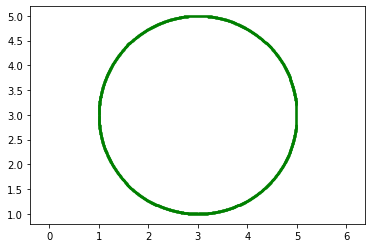

In [84]:
plot_circle([3,3], 2)

## Aplicação

No último capítulo vimos o poder da representação de medidas e propriedades de elementos  do mundo físico  no plano cartesiano através de pontos.

Vejamos um segundo exemplo:

In [22]:
from sklearn.datasets import load_iris

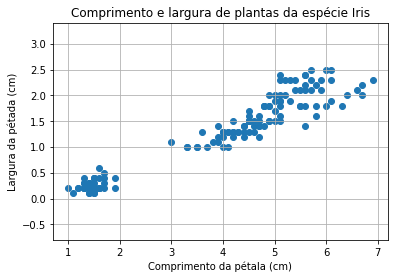

In [69]:
data = load_iris()

x_coordinates = data.data[:,2]
y_coordinates = data.data[:,3]

    
plt.scatter(x_coordinates, y_coordinates)
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétada (cm)")
plt.title("Comprimento e largura de plantas da espécie Iris")
plt.grid("on")
plt.axis("equal")
plt.show()

Podemos separar as espécies de Iris entre Setosa e Outras:

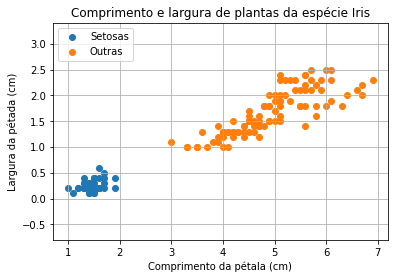

In [81]:
x_setosas = data.data[:50,2]
y_setosas = data.data[:50,3]

x_outras = data.data[50:,2]
y_outras = data.data[50:,3]

plt.scatter(x_setosas, y_setosas)
plt.scatter(x_outras, y_outras)
plt.legend(labels = ('Setosas', 'Outras'), loc = 'upper left')
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétada (cm)")
plt.title("Comprimento e largura de plantas da espécie Iris")
plt.grid("on")
plt.axis("equal")
plt.show()

Observamos que é possível definir áreas dentro de círculos para distinguir as espécies.

Faremos o mesmo gráfico agora incluindo um círculo de raio $R=1$ e centro $P=\left(\frac{3}{2},\frac{1}{2}\right)$.

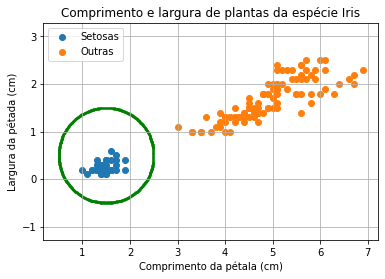

In [88]:
x_setosas = data.data[:50,2]
y_setosas = data.data[:50,3]

x_outras = data.data[50:,2]
y_outras = data.data[50:,3]

plt.scatter(x_setosas, y_setosas)
plt.scatter(x_outras, y_outras)
plot_circle([1.5, 0.5], 1)
plt.legend(labels = ('Setosas', 'Outras'), loc = 'upper left')
plt.xlabel("Comprimento da pétala (cm)")
plt.ylabel("Largura da pétada (cm)")
plt.title("Comprimento e largura de plantas da espécie Iris")
plt.grid("on")
plt.axis("equal")
plt.show()

Por fim obtemos um modelo que, para este conjunto, contempla todos os casos de distinção de espécies:

Dados $x$ o comprimento de uma pétala em centímetros de uma planta $Z$ da espécie Iris e $y$ a largura de uma pétala em centímetros de $Z$. Então, a função que distingue $Z$ entre Setosa ou Outra é a seguinte:

$$
f(Z) = f(x, y) = \left\{
    \begin{array}{c}
        \text{Setosa,} & \text{se }d(\left(\frac{3}{2},\frac{1}{2}\right), Z) \leq 1, \\
        \text{Outra,}  & \text{se } d(\left(\frac{3}{2},\frac{1}{2}\right), Z) > 1, \\
    \end{array}
\right.
$$

Conhecer outros elementos geométricos é essencial para delimitar regiões mais complexas e assim determinar modelos melhores.